# sample workflow for Liquid-liquid interface

I use LL.in from dir ../namics/inputs. I make a few changes. Store the file locally in LL_.in. Then I run the problem using 'namics' stored in ../namics/inputs. The program saves the results locally in the output folder. Then I load the 'profile data' and plot the 'density profiles'. 

methods to automate the 'handle' of input_file:

df=insert(inx,df,typ,name,prop,val)

df=append(df,type,name,prop,val)

df=delete(idx,df)

df=comment(idx,df)

df=uncomment(idx,df)

df=puttype(idx,df,value)

df=putname(idx,df,value)

df=putprop(idx,df,value)

df=putvalue(idx,df,value)

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def insert(idx,df,typ,name,prop,val): 
    dfA = df.iloc[:idx,] 
    dfB = df.iloc[idx:,]
    line=df.iloc[-1]
    line[0]=typ
    line[1]=name
    line[2]=prop
    line[3]=val
    df = dfA.append(line).append(dfB).reset_index(drop = True) 
    return df
def append(df,typ,name,prop,val):
    idx = df.index
    number = len(idx)
    dfA = df.iloc[:number,] 
    dfB = df.iloc[number:,]
    line=df.iloc[-1]
    line[0]=typ
    line[1]=name
    line[2]=prop
    line[3]=val
    df = dfA.append(line).append(dfB).reset_index(drop=True)
    line=df.iloc[-1]
    line[0]="//ignore"
    line[1]=""
    line[2]=""
    line[3]=""
    df = dfA.append(line).append(dfB).reset_index(drop=True)
    return df
def delete(idx,df):
    dfA=df.iloc[:idx,]
    dfB=df.iloc[idx+1:,]
    df=dfA.append(dfB).reset_index(drop=True)
    return df
def comment(idx,df):
    line=df.iloc[idx]
    x=line[0]
    x="//"+x
    line[0]=x
    return df
def uncomment(idx,df):
    line=df.iloc[idx]
    x=line[0]
    x=x[2:]
    line[0]=x
    return df
def putvalue(idx,df,value):
    line=df.iloc[idx]
    line[3]=value
    return df
def puttype(idx,df,value):
    line=df.iloc[idx]
    line[0]=value
    return df
def putname(idx,df,value):
    line=df.iloc[idx]
    line[1]=value
    return df
def putprop(idx,df,value):
    line=df.iloc[idx]
    line[2]=value
    return df


In [78]:
input=pd.read_csv("../namics/inputs/LL.in",sep=':',header=None)
#input

In [67]:
input.to_csv("LL_.in",sep=':',header=False,index=False)

In [49]:

!../namics/inputs//namics LL_.in > LL_.out


In [76]:
#ls output


In [80]:
pro1=pd.read_csv("output/LL__1_3.pro",sep='\t')
pro2=pd.read_csv("output/LL__4_3.pro",sep='\t')
#pro1.head()
#pro2.head()

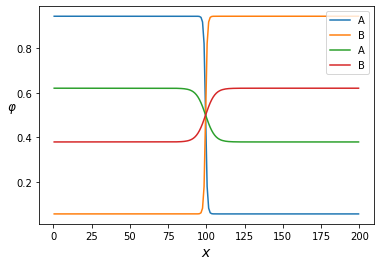

In [55]:

plt.plot(pro1.x,pro1.mon_A_phi,label='A')
plt.plot(pro1.x,pro1.mon_B_phi,label='B')
plt.plot(pro2.x,pro2.mon_A_phi,label='A')
plt.plot(pro2.x,pro2.mon_B_phi,label='B')
plt.xlabel("$x$",fontsize=14)
plt.ylabel(r'$\mathit{\varphi}$',fontsize=12,rotation=0)
plt.legend(loc="best")
plt.show()



In [132]:
kal=pd.read_csv("output/LL_.kal",sep='\t')
kal.head()

,mon_A_chi_B,sys_L_grand_potential,mol_A_width,mol_A_phi(1),mol_A_phibulk
0,0.80,0.125945,2.737345,0.945322,0.054678
1,0.79,0.121196,2.765758,0.942488,0.057512
2,0.78,0.116439,2.796037,0.939480,0.060520
3,0.77,0.111674,2.828365,0.936287,0.063714
4,0.76,0.106903,2.862951,0.932892,0.067108


In [135]:
A=kal['mol_A_phi(1)']
B=kal['mol_A_phibulk']
kal["phi_1_phibulk"]=(A-B)

In [150]:
xx=kal.mon_A_chi_B[3]

A[2]


0.9394802

In [145]:
#kal.rename(columns={'phi_1_phibulk':'phi_1_min_phibulk'},inplace=True)
kal.head()

2.862951084923116

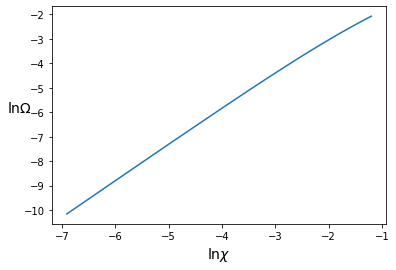

In [74]:

plt.plot(np.log(kal.mon_A_chi_B-0.5),np.log(kal.sys_L_grand_potential))
plt.xlabel(r'$\mathrm{ln} \chi$',fontsize=14)
plt.ylabel(r'$\mathrm{ln} \Omega$',fontsize=14,rotation=0)
plt.show()

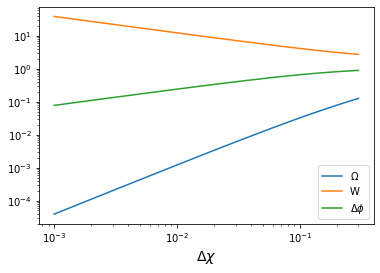

In [124]:
plt.loglog(kal.mon_A_chi_B-0.5,kal.sys_L_grand_potential,label=r'$\Omega$')
plt.loglog(kal.mon_A_chi_B-0.5,kal.mol_A_width,label='W')
plt.loglog(kal.mon_A_chi_B-0.5,kal.phi_1_phibulk,label=r'$\Delta \phi$')
plt.xlabel(r'$\Delta \chi$',fontsize=14)
#plt.ylabel(r'$\Omega$',fontsize=14,rotation=0)
plt.legend(loc="best")
plt.show()